# Input Image

In [173]:
import matplotlib.pyplot as plt
from PIL import Image,ImageOps
import numpy as np
img = Image.open('photo.jpg')
# plt.imshow(img)
# plt.show()
pixel_values=list(img.getdata())
#pixel_values=np.copy(gray_image)
# pixel_values

500 500


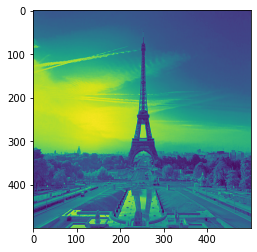

In [174]:
w,h=img.size
print(w,h)
k=0
gray=[]
for i in range(w):
    for j in range(h):
        r,g,b=pixel_values[k]
        value=0.2989 * r + 0.5870 * g + 0.1140 * b
        gray.append(int(round(value,0)))
        k=k+1
gray_image = np.array([gray[i:i+w] for i in range(0, w*h, w)])

        
# gray_image = list(two_gray)
# print((gray_image[2][6]))
plt.imshow(gray_image)
plt.show()
img2 = Image.open('hist.png')
img3 = Image.open('equal1.png')

81 59


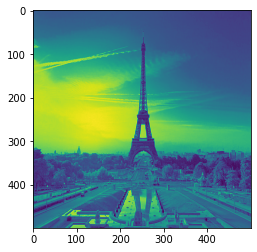

In [175]:
# pixel_values=gray_image.getdata()
# print(pixel_values)
h,w=img.size
# print(h,w)
sum=0
for i in range(h):
    sum=sum+gray_image[i][0]
for i in range(h):
    sum=sum+gray_image[0][i]
for i in range(h):
    sum=sum+gray_image[0][h-1]
for i in range(h):
    sum=sum+gray_image[h-1][0]
sum=sum-(gray_image[h-1][h-1]+gray_image[h-1][0]+gray_image[0][h-1]+gray_image[0][0])
avg=int(sum/(h*4 -4))
print(avg,gray_image[0][0])
for i in range (h):
    gray_image[i][0]=avg
for i in range(h):
    gray_image[0][i]=avg
for i in range(h):
    gray_image[0][h-1]=avg
for i in range(h):
    gray_image[h-1][0]=avg
    
      


plt.imshow(gray_image)
plt.show()
#new=list(new_img.getdata())
#new


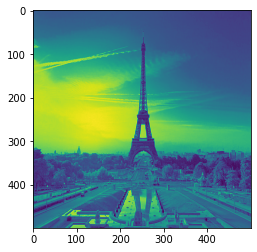

<BarContainer object of 256 artists>

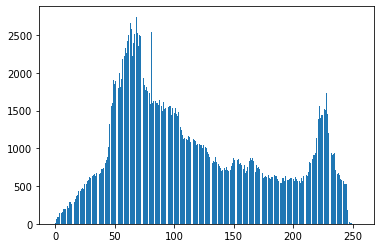

In [168]:

plt.imshow(gray_image)
plt.show()
pixel_values=np.copy(gray_image)
gray_scale = np.zeros(pixel_values.max()+1)
# print(pixel_values)


w,h=pixel_values.shape
gray_array = np.array(gray_image)
#print(gray_array)
gray_histogram = [0] * 256
#print(gray_histogram)
for i in range(w):
    for j in range(h):
        pixel_value = gray_array[i,j]
        gray_histogram[pixel_value] += 1



        
plt.bar(range(len(gray_histogram)),gray_histogram)


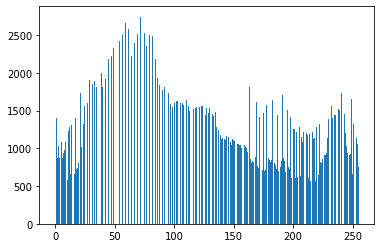

In [142]:
import numpy as np
import matplotlib.pyplot as plt

# convert image to gray scale. take mean of all channels(red, green, blue)
def gray_image_find(img):
    return np.mean(img, axis=-1).astype(np.uint8)

def gray_level_histrogram(img):
    his = np.zeros(256)
    for i in range(w):
        for j in range(w):
            pixel_value = gray_array[i,j]
            his[pixel_value] += 1
    return his

# probability of gray level
def bit_prk(h):
    return h / np.sum(h)

# cumulative distribution function
def prk_cdf(prk):
    cdf = np.zeros(256)
    for i in range(256):
        cdf[i] = np.sum(prk[:i+1])
    return cdf

# histogram equalization
def hist_equalization(cdf, nrk):
    hist_equalization_bit = np.round(cdf * 255).astype(np.uint8)
    hist_nrk = np.zeros(256)
    for i in range(256):
        hist_nrk[hist_equalization_bit[i]] += nrk[i]
    return hist_nrk


def plot_histrogram(h):
    plt.bar(np.arange(256), h)
    plt.show()

img = gray_image
# print(img)
nrk = gray_level_histrogram(gray_image_find(img))
prk = bit_prk(nrk)
cdf = prk_cdf(prk)
new_img = hist_equalization(cdf, nrk)

plot_histrogram(new_img)

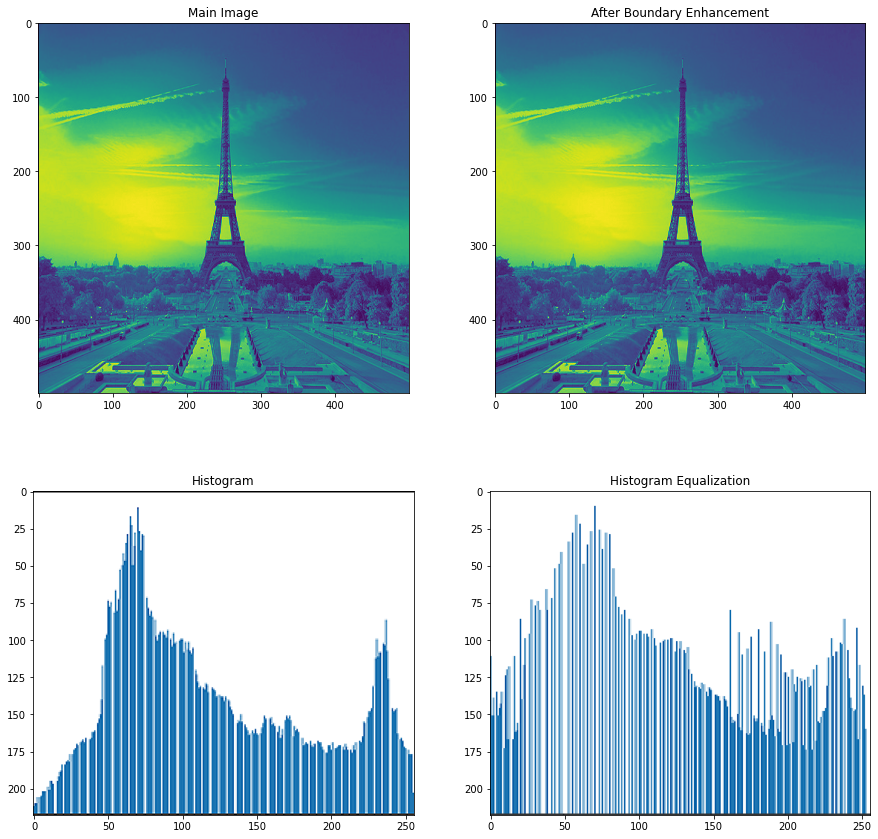

In [151]:

fig, axs = plt.subplots(2, 2, figsize=(15, 15))
axs[0][0].set_title('Main Image')
axs[0][0].imshow(gray_image)
axs[0][1].set_title('After Boundary Enhancement')
axs[0][1].imshow(gray_image)
axs[1][0].set_title('Histogram')
axs[1][0].imshow(img2)
axs[1][1].set_title('Histogram Equalization')
axs[1][1].imshow(img3)